## Load Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

import nltk
from nltk.corpus import wordnet

### Initial Setup

In [2]:
import os
os.getcwd()

'd:\\ironhack_bootcamp\\main-bootcamp\\week7\\fake-news-detection-nlp\\notebooks'

In [3]:
os.chdir(r"D:\ironhack_bootcamp\main-bootcamp\week7\fake-news-detection-nlp")

## Load Dataset

In [4]:
data = pd.read_csv("dataset/raw/training_data.csv", sep="\t", header=None)
df =data.copy()

df.head()

,0,1
0,0,donald trump sends out embarrassing new year‚s...
1,0,drunk bragging trump staffer started russian c...
2,0,sheriff david clarke becomes an internet joke ...
3,0,trump is so obsessed he even has obama‚s name ...
4,0,pope francis just called out donald trump duri...


In [5]:
df.columns = ['label', 'news_headline']

col = df.pop('label')
df['label'] = col

In [6]:
pd.set_option('display.max_colwidth',200)
df.sample(10)

,news_headline,label
86,new accuser confirms she got roy moore banned from the mall (videos),0
34097,kenyans entitled to rebel if vote goes ahead: kisumu governor,1
11411,horrible! top democrats refuse to stand for gold star widow [video],0
10157,eric bolling accuser is serial sexual harassment accuser,0
12231,wow! white liberals suggest blacks are too stupid to get id‚s‚can‚t figure out how to use internet [video],0
27692,plan to raise california minimum wage to $15 clears key panel,1
30059,botswana court orders government to recognize transgender woman as female,1
7566,popular st. louis bar closed for having a clientele too black for the neighborhood (screenshots),0
31435,former zimbabwe finmin chombo detained until bail hearing monday,1
19165,u.s. challenged by rising north korea tensions\trussia urges calm,1


In [7]:
df.shape

(34152, 2)

In [8]:
type(df)

pandas.DataFrame

In [9]:
# Check the class distribution
df['label'].value_counts()

label
0    17572
1    16580
Name: count, dtype: int64

C:\Users\harma\AppData\Local\Temp\ipykernel_6604\548395595.py:5: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#2A9D8F'` for the same effect.

  sns.countplot(data=df, x='label', color='#2A9D8F', hue='label')


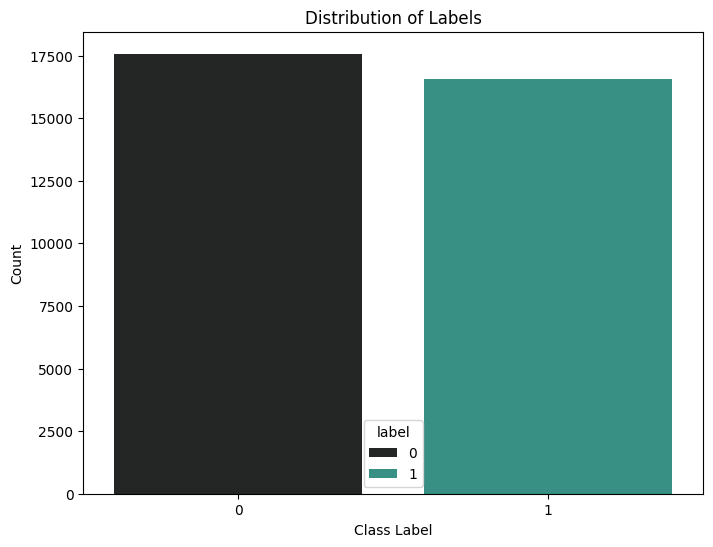

In [10]:
import seaborn as sns

plt.figure(figsize=(8, 6))

sns.countplot(data=df, x='label', color='#2A9D8F', hue='label')

plt.xlabel("Class Label")
plt.ylabel("Count")
plt.title("Distribution of Labels")
plt.xticks([0, 1])

plt.show()

## Data Cleaning

### Separate Label

In [11]:
# Split the dataset
y = df['label']                     # target
X = df['news_headline']           # features

pd.set_option('display.max_colwidth',250)
X.sample(10)

20214                                               ryan says u.s. tax reform consensus nears\tdoes not mention border tax
12340                                                                                                          whoa! blood
1308                                       hillary just showed the whole world that she can still kick trump‚s a** (image)
26702                                                    kerry launches talks with venezuela but backs disputed referendum
28327                                                  pressure grows on hillary clinton to release goldman sachs speeches
21922                                                              trump\txi agree to 100-day plan to discuss trade issues
6951                                     samantha bee takes on the nra and its ‚asinine‚ mascot and it is glorious (video)
22894                                                trump says he'll decide on national security adviser in next few days
18605           

In [12]:
X.head()

0               donald trump sends out embarrassing new year‚s eve message; this is disturbing
1                         drunk bragging trump staffer started russian collusion investigation
2    sheriff david clarke becomes an internet joke for threatening to poke people ‚in the eye‚
3                trump is so obsessed he even has obama‚s name coded into his website (images)
4                        pope francis just called out donald trump during his christmas speech
Name: news_headline, dtype: str

### Cleaning Steps

In [13]:
print(X[9337])

https://100percentfedup.com/served-roy-moore-vietnamletter-veteran-sets-record-straight-honorable-decent-respectable-patriotic-commander-soldier/


In [14]:
#Check for html links
X.str.contains(r"https?://\S+.\w", regex=True).sum()

np.int64(7)

In [15]:
print(X[14178])

listen to hillary laugh‚as she recalls helping suspected child rapist walk free [video]


In [16]:
from utils.clean_text import *
X = X.apply(preprocess_text)

In [17]:
print(X[15185])

yr old black conservative whose video obama go viral really love america receives death threat leave


In [18]:
print(X[14178])

listen hillary laugh recall help suspect child rapist walk free video


In [19]:
pd.set_option('display.max_colwidth',200)
X.sample(10)

6709                                    christian nutjobs eliminate evolution
8408     bigot upset daughter taught world history sue maryland public school
27059                    congress forecaster see major saving sentence reform
24114             u republican senator introduces obamacare repeal resolution
33921                                        trump defense chief dmz goal war
6567               john mccain top campaign adviser abandon gop trump instead
5572                        donald trump claim strong gop candidate ever bull
9558           fbi informant blow whistle obama doj intimidation tactic video
4785                        detroit black voter show trump fool call outreach
2380                john kasich completely get rid obamacare acceptable video
Name: news_headline, dtype: str

In [20]:
print(X.shape)
print(y.shape)

(34152,)
(34152,)


In [21]:
df = pd.concat([X, y], axis=1)

In [22]:
df.head()

,news_headline,label
0,donald trump sends embarrass new year eve message disturbing,0
1,drunk brag trump staffer start russian collusion investigation,0
2,sheriff david clarke become internet joke threaten poke people eye,0
3,trump obsess even obama name cod website image,0
4,pope francis call donald trump christmas speech,0


In [23]:
data.tail(5)

,0,1
34147,1,tears in rain as thais gather for late king's funeral
34148,1,pyongyang university needs non-u.s. teachers as travel ban leaves staff shortages
34149,1,philippine president duterte to visit japan ahead of key regional summits
34150,1,japan's abe may have won election\tbut many don't want him as pm
34151,1,demoralized and divided: inside catalonia's police force


In [24]:
df.tail(5)

,news_headline,label
34147,tear rain thais gather late king funeral,1
34148,pyongyang university need non u teacher travel ban leaf staff shortage,1
34149,philippine president duterte visit japan ahead key regional summit,1
34150,japan abe may election many want pm,1
34151,demoralize divide inside catalonia police force,1


In [25]:
df.to_csv("dataset/processed/clean_dataset.csv", index=False, sep=",")

### Split the Dataset

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("X_train size:", X_train.shape)
print("X_test size:", X_test.shape)
print("y_train size:", y_train.shape)
print("y_test size:", y_test.shape)

X_train size: (27321,)
X_test size: (6831,)
y_train size: (27321,)
y_test size: (6831,)


In [27]:
y_train.value_counts()

label
0    14057
1    13264
Name: count, dtype: int64

In [28]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

print("Features names:", vectorizer.get_feature_names_out())


Features names: ['aar' 'aardvark' 'aaron' ... 'zuma' 'zummar' 'zurich']


In [29]:
len(vectorizer.get_feature_names_out())

13248

In [30]:
feature_names = vectorizer.get_feature_names_out()

first_doc = X_train_vec[1].toarray()[0]

for word, count in zip(feature_names, first_doc):
    if count > 0:
        print(word, count)

call 1
damn 1
defend 1
donald 1
father 1
know 1
niger 1
phone 1
president 1
sign 1
slain 1
soldier 1
son 1
trump 2


In [31]:
metrics_df = pd.DataFrame()

In [32]:
"""import pandas as pd
from utils.count_vectorize import *
from sklearn.linear_model import LogisticRegression

metrics_df = pd.DataFrame()

ngram_list = [(1,1), (1,2), (2,2)]
min_df_list = [1, 5]

for n in ngram_list:
    for m in min_df_list:
        
        model = LogisticRegression(max_iter=1000)
        
        row = run_bow_experiment(
            model=model,
            X_train=X_train,
            X_test=X_test,
            y_train=y_train,
            y_test=y_test,
            ngram_range=n,
            min_df=m,
            comments=f"ngram={n}, min_df={m}, max_df=1"
        )
        metrics_df = pd.concat(
            [metrics_df, pd.DataFrame([row])],
            ignore_index=True
        )

metrics_df"""

'import pandas as pd\nfrom utils.count_vectorize import *\nfrom sklearn.linear_model import LogisticRegression\n\nmetrics_df = pd.DataFrame()\n\nngram_list = [(1,1), (1,2), (2,2)]\nmin_df_list = [1, 5]\n\nfor n in ngram_list:\n    for m in min_df_list:\n\n        model = LogisticRegression(max_iter=1000)\n\n        row = run_bow_experiment(\n            model=model,\n            X_train=X_train,\n            X_test=X_test,\n            y_train=y_train,\n            y_test=y_test,\n            ngram_range=n,\n            min_df=m,\n            comments=f"ngram={n}, min_df={m}, max_df=1"\n        )\n        metrics_df = pd.concat(\n            [metrics_df, pd.DataFrame([row])],\n            ignore_index=True\n        )\n\nmetrics_df'

In [33]:
from utils.count_vectorize import *
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

models = [
    LogisticRegression(max_iter=1000),
    LinearSVC(),
    MultinomialNB()
]
for model in models:
    for n in [(1,1), (1,2), (2,2)]:
        for m in [1, 5]:

            row = run_bow_experiment(
                model=model,
                X_train=X_train,
                X_test=X_test,
                y_train=y_train,
                y_test=y_test,
                ngram_range=n,
                min_df=m,
                comments=f"ngram={n}, min_df={m}"
            )

            metrics_df = pd.concat(
                [metrics_df, pd.DataFrame([row])],
                ignore_index=True
            )

In [36]:
metrics_df.round(4).sort_values(by='gap_percent', ascending= True)

,model,ngram_range,min_df,max_df,max_features,test_accuracy,train_f1,test_f1,gap_percent,comments
13,MultinomialNB,"(1, 1)",5,1.0,10000,0.9245,0.9329,0.9215,1.14,"ngram=(1, 1), min_df=5"
15,MultinomialNB,"(1, 2)",5,1.0,10000,0.9281,0.9383,0.9254,1.29,"ngram=(1, 2), min_df=5"
14,MultinomialNB,"(1, 2)",1,1.0,10000,0.9287,0.9394,0.9260,1.34,"ngram=(1, 2), min_df=1"
12,MultinomialNB,"(1, 1)",1,1.0,10000,0.9259,0.9404,0.9231,1.73,"ngram=(1, 1), min_df=1"
1,LogisticRegression,"(1, 1)",5,1.0,10000,0.9293,0.9601,0.9282,3.20,"ngram=(1, 1), min_df=5"
5,LogisticRegression,"(2, 2)",5,1.0,10000,0.8211,0.8653,0.8327,3.26,"ngram=(2, 2), min_df=5"
3,LogisticRegression,"(1, 2)",5,1.0,10000,0.9331,0.9704,0.9318,3.86,"ngram=(1, 2), min_df=5"
0,LogisticRegression,"(1, 1)",1,1.0,10000,0.9293,0.9668,0.9281,3.87,"ngram=(1, 1), min_df=1"
17,MultinomialNB,"(2, 2)",5,1.0,10000,0.7896,0.7936,0.7535,4.02,"ngram=(2, 2), min_df=5"
2,LogisticRegression,"(1, 2)",1,1.0,10000,0.9338,0.9731,0.9326,4.05,"ngram=(1, 2), min_df=1"


MultinomialNB is very stable (low gap)

LogisticRegression gives higher performance

LinearSVC is slightly worse here

*Unigram + bigram (1,2) consistently best.
*Pure bigrams (2,2) perform poorly.
*MultinomialNB is competitive but slightly lower performance than linear regression.

In [47]:
top5 = metrics_df.sort_values("test_f1", ascending=False).head(5).reset_index(drop=True)
top5

,model,ngram_range,min_df,max_df,max_features,test_accuracy,train_f1,test_f1,gap_percent,comments
0,LogisticRegression,"(1, 2)",1,1.0,10000,0.933831,0.973095,0.932557,4.05,"ngram=(1, 2), min_df=1"
1,LogisticRegression,"(1, 2)",5,1.0,10000,0.933099,0.970395,0.931781,3.86,"ngram=(1, 2), min_df=5"
2,LogisticRegression,"(1, 1)",5,1.0,10000,0.929293,0.960126,0.928157,3.20,"ngram=(1, 1), min_df=5"
3,LogisticRegression,"(1, 1)",1,1.0,10000,0.929293,0.966795,0.928071,3.87,"ngram=(1, 1), min_df=1"
4,MultinomialNB,"(1, 2)",1,1.0,10000,0.928707,0.939394,0.926022,1.34,"ngram=(1, 2), min_df=1"


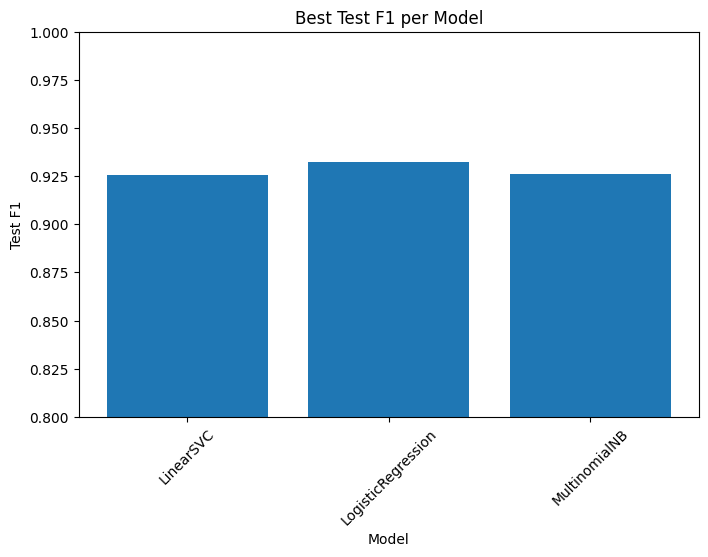

In [ ]:
import matplotlib.pyplot as plt

# Get best config per model
best_per_model = (
    metrics_df
    .sort_values("test_f1", ascending=False)
    .groupby("model")
    .first()
    .reset_index()
)

plt.figure(figsize=(8,5))
plt.bar(best_per_model["model"], best_per_model["test_f1"], color= '')
plt.title("Best Test F1 per Model")
plt.xlabel("Model")
plt.ylabel("Test F1")
plt.ylim(0.8, 1.0)
plt.xticks(rotation=45)
plt.show()

In [44]:
metrics_df.to_csv("reports/bow_logreg_svm_nb_results.csv")

In [49]:
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier

model_classes = [
    LogisticRegression,
    LinearSVC,
    MultinomialNB,
    RandomForestClassifier,
    XGBClassifier
]

for model_class in model_classes:
    for n in [(1,1), (1,2)]:
        for m in [1, 5]:

            model = model_class()

            row = run_bow_experiment(
                model=model,
                X_train=X_train,
                X_test=X_test,
                y_train=y_train,
                y_test=y_test,
                ngram_range=n,
                min_df=m,
                comments=f"ngram={n}, min_df={m}"
            )

            metrics_df1 = pd.concat(
                [metrics_df, pd.DataFrame([row])],
                ignore_index=True
            )

In [50]:
metrics_df1

,model,ngram_range,min_df,max_df,max_features,test_accuracy,train_f1,test_f1,gap_percent,comments
0,LogisticRegression,"(1, 1)",1,1.0,10000,0.929293,0.966795,0.928071,3.87,"ngram=(1, 1), min_df=1"
1,LogisticRegression,"(1, 1)",5,1.0,10000,0.929293,0.960126,0.928157,3.20,"ngram=(1, 1), min_df=5"
2,LogisticRegression,"(1, 2)",1,1.0,10000,0.933831,0.973095,0.932557,4.05,"ngram=(1, 2), min_df=1"
3,LogisticRegression,"(1, 2)",5,1.0,10000,0.933099,0.970395,0.931781,3.86,"ngram=(1, 2), min_df=5"
4,LogisticRegression,"(2, 2)",1,1.0,10000,0.846875,0.912169,0.852593,5.96,"ngram=(2, 2), min_df=1"
5,LogisticRegression,"(2, 2)",5,1.0,10000,0.821110,0.865254,0.832694,3.26,"ngram=(2, 2), min_df=5"
6,LinearSVC,"(1, 1)",1,1.0,10000,0.924462,0.989534,0.922708,6.68,"ngram=(1, 1), min_df=1"
7,LinearSVC,"(1, 1)",5,1.0,10000,0.919924,0.978730,0.918077,6.07,"ngram=(1, 1), min_df=5"
8,LinearSVC,"(1, 2)",1,1.0,10000,0.927829,0.995555,0.925809,6.97,"ngram=(1, 2), min_df=1"
9,LinearSVC,"(1, 2)",5,1.0,10000,0.926072,0.994577,0.924049,7.05,"ngram=(1, 2), min_df=5"


In [53]:
metrics_df1.round(4).sort_values(by='test_f1', ascending= False)

,model,ngram_range,min_df,max_df,max_features,test_accuracy,train_f1,test_f1,gap_percent,comments
2,LogisticRegression,"(1, 2)",1,1.0,10000,0.9338,0.9731,0.9326,4.05,"ngram=(1, 2), min_df=1"
20,LogisticRegression,"(1, 2)",1,1.0,10000,0.9338,0.9731,0.9326,4.05,"ngram=(1, 2), min_df=1"
3,LogisticRegression,"(1, 2)",5,1.0,10000,0.9331,0.9704,0.9318,3.86,"ngram=(1, 2), min_df=5"
21,LogisticRegression,"(1, 2)",5,1.0,10000,0.9331,0.9704,0.9318,3.86,"ngram=(1, 2), min_df=5"
19,LogisticRegression,"(1, 1)",5,1.0,10000,0.9293,0.9601,0.9282,3.20,"ngram=(1, 1), min_df=5"
1,LogisticRegression,"(1, 1)",5,1.0,10000,0.9293,0.9601,0.9282,3.20,"ngram=(1, 1), min_df=5"
0,LogisticRegression,"(1, 1)",1,1.0,10000,0.9293,0.9668,0.9281,3.87,"ngram=(1, 1), min_df=1"
18,LogisticRegression,"(1, 1)",1,1.0,10000,0.9293,0.9668,0.9281,3.87,"ngram=(1, 1), min_df=1"
14,MultinomialNB,"(1, 2)",1,1.0,10000,0.9287,0.9394,0.9260,1.34,"ngram=(1, 2), min_df=1"
28,MultinomialNB,"(1, 2)",1,1.0,10000,0.9287,0.9394,0.9260,1.34,"ngram=(1, 2), min_df=1"


In [54]:
metrics_df1.to_csv("reports/bow_lr_svm_nb_rf_xgb_results.csv")

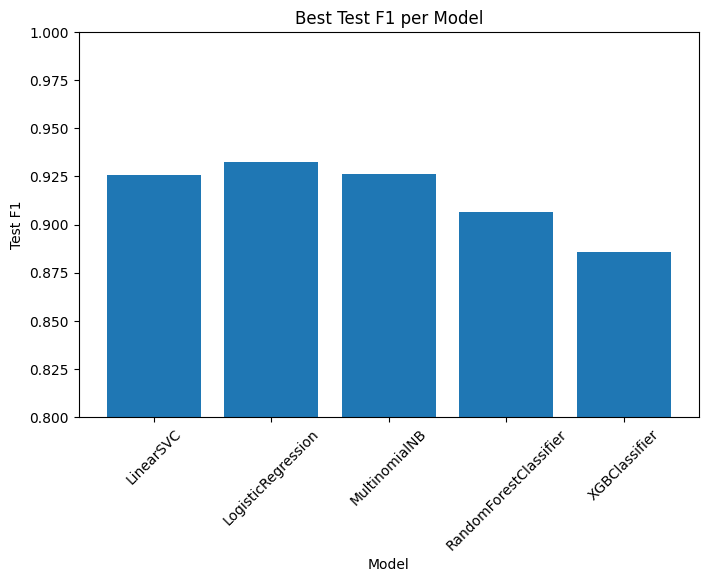

In [57]:
# Get best config per model
best_per_model =  metrics_df1.sort_values("test_f1", ascending=False).groupby("model").first().reset_index()

plt.figure(figsize=(8,5))
plt.bar(best_per_model["model"], best_per_model["test_f1"])
plt.title("Best Test F1 per Model")
plt.xlabel("Model")
plt.ylabel("Test F1")
plt.ylim(0.8, 1.0)
plt.xticks(rotation=45)
plt.show()

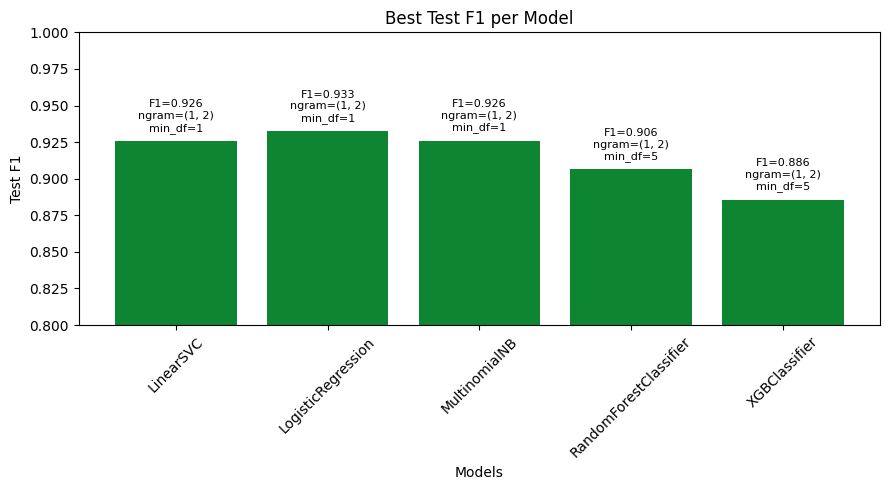

In [67]:
import matplotlib.pyplot as plt
import numpy as np

# Get best config per model
best_per_model = (
    metrics_df1
    .sort_values("test_f1", ascending=False)
    .groupby("model")
    .first()
    .reset_index()
)

models = best_per_model["model"]
scores = best_per_model["test_f1"]

plt.figure(figsize=(9,5))

bars = plt.bar(
    models,
    scores,
    # hatch="///",        # hatch pattern
    color="#0e8530",      # hex color (blue)
    # edgecolor="black"

)

plt.title("Best Test F1 per Model")
plt.xlabel("Models")
plt.ylabel("Test F1")
plt.ylim(0.8, 1.0)
plt.xticks(rotation=45)

# Add value labels + best parameters
for i, bar in enumerate(bars):
    height = bar.get_height()
    
    label_text = (
        f"F1={height:.3f}\n"
        f"ngram={best_per_model['ngram_range'][i]}\n"
        f"min_df={best_per_model['min_df'][i]}"
    )
    
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height + 0.005,
        label_text,
        ha="center",
        va="bottom",
        fontsize=8
    )

plt.tight_layout()
plt.show()

### TFIDF